#Importing the Dependencies


In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px
from sklearn import preprocessing

#Data Collection 


In [120]:
kidney = pd.read_csv("/content/kidney_disease.csv")
kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [121]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [122]:
kidney.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


Mapping the categorical to numerical and cleaning the dataset

In [123]:
kidney[['htn','dm','cad','pe','ane']] = kidney[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
kidney[['rbc','pc']] = kidney[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
kidney[['pcc','ba']] = kidney[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
kidney[['appet']] = kidney[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
kidney['classification'] = kidney['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
kidney.rename(columns={'classification':'classs'},inplace=True)

kidney['pe'] = kidney['pe'].replace(to_replace='good',value=0)
kidney['appet'] = kidney['appet'].replace(to_replace='no',value=0)
kidney['cad'] = kidney['cad'].replace(to_replace='\tno',value=0)
kidney['dm'] = kidney['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
kidney.drop('id',axis=1,inplace=True)

In [124]:
kidney.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classs
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


rename column names to make it more effective

In [125]:
cols_names={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"haemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

kidney.rename(columns=cols_names, inplace=True)

In [126]:
kidney.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classs
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [127]:
len(kidney)-kidney.count()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classs                       0
dtype: int64

In [128]:
kidney.isnull().sum(axis = 1)

0      3
1      5
2      3
3      0
4      2
      ..
395    0
396    0
397    0
398    0
399    0
Length: 400, dtype: int64

In [129]:
kidney.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classs
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


#data visualization.

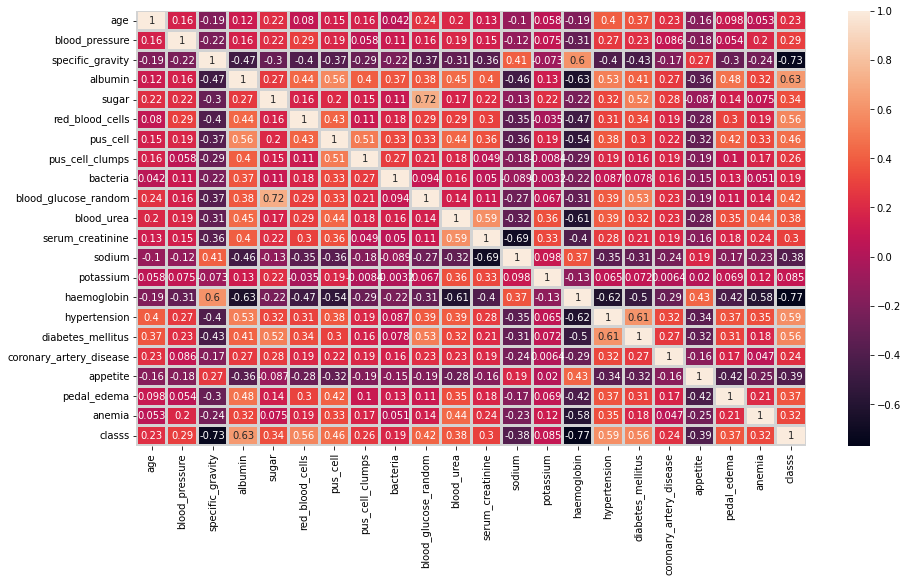

In [130]:
plt.figure(figsize = (15, 8))

sns.heatmap(kidney.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


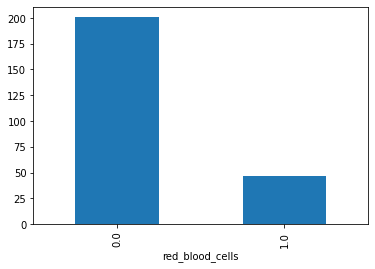

In [131]:
print(kidney.groupby('red_blood_cells').red_blood_cells.count().plot(kind="bar"))

In [132]:
kidney['red_blood_cells'].value_counts()

0.0    201
1.0     47
Name: red_blood_cells, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


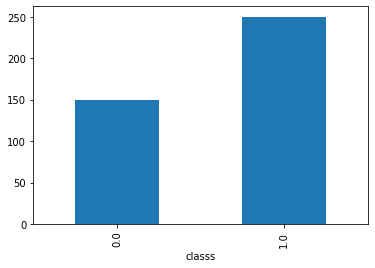

In [133]:
print(kidney.groupby('classs').classs.count().plot(kind="bar"))

In [134]:
kidney['classs'].value_counts()

1.0    250
0.0    150
Name: classs, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


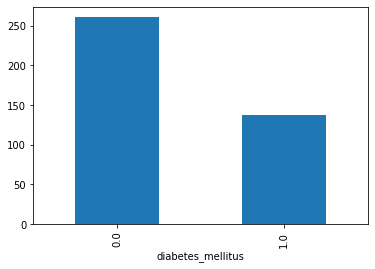

In [135]:
print(kidney.groupby('diabetes_mellitus').diabetes_mellitus.count().plot(kind="bar"))

In [136]:
kidney['diabetes_mellitus'].value_counts()

0.0    261
1.0    137
Name: diabetes_mellitus, dtype: int64

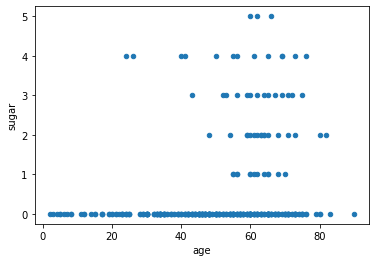

In [137]:
kidney.plot(kind='scatter', x='age',y='sugar');
plt.show()

In [138]:
def violin(col):
    fig = px.violin(kidney, y=col, x="classs", color="classs", box=True, template = 'plotly_dark')
    return fig.show()

In [139]:
violin('red_blood_cell_count')

In [140]:
violin('white_blood_cell_count')

In [141]:
violin('packed_cell_volume')

In [142]:
violin('albumin')

In [143]:
violin('blood_glucose_random')

In [144]:
violin('sodium')

In [145]:
violin('blood_urea')

In [146]:
violin('specific_gravity')

In [147]:
def scatter(col1, col2):
    fig = px.scatter(kidney, x=col1, y=col2, color="classs", template = 'plotly_dark')
    return fig.show()

In [148]:
scatter('haemoglobin', 'packed_cell_volume')

In [149]:
scatter('red_blood_cell_count', 'packed_cell_volume')

In [150]:
scatter('red_blood_cell_count', 'albumin')

In [151]:
scatter('sugar', 'blood_glucose_random')

In [152]:
scatter('packed_cell_volume','blood_urea')

#Data Pre Processing

In [153]:
kidney.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       130
white_blood_cell_count     105
potassium                   88
sodium                      87
packed_cell_volume          70
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
anemia                       1
appetite                     1
pedal_edema                  1
classs                       0
dtype: int64

filling null values:
-we will use random sampling for higher null values.
-mean/mode sampling for lower null values.



In [154]:
def random_value_imputation(feature):
    random_sample = kidney[feature].dropna().sample(kidney[feature].isna().sum())
    random_sample.index = kidney[kidney[feature].isnull()].index
    kidney.loc[kidney[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = kidney[feature].mode()[0]
    kidney[feature] = kidney[feature].fillna(mode)

In [155]:
for col in kidney:
    random_value_imputation(col)

Modify the data to be numircale 

In [156]:
kidney['packed_cell_volume'].replace('\t?','0',inplace=True)
kidney['packed_cell_volume'].replace('\t43','43',inplace=True)

In [157]:
kidney['packed_cell_volume']=kidney['packed_cell_volume'].astype(str).astype(int)
kidney['packed_cell_volume']

0      44
1      38
2      31
3      32
4      35
       ..
395    47
396    54
397    49
398    51
399    53
Name: packed_cell_volume, Length: 400, dtype: int64

In [158]:
kidney['white_blood_cell_count'].replace('\t6200','6200',inplace=True)
kidney['white_blood_cell_count'].replace('\t8400','8400',inplace=True)
kidney['white_blood_cell_count'].replace('\t?','0',inplace=True)
kidney['white_blood_cell_count']=kidney['white_blood_cell_count'].astype(str).astype(int)
kidney['white_blood_cell_count'].unique()

array([ 7800,  6000,  7500,  6700,  7300,  9500,  6900,  9600, 12100,
        9800,  4500, 12200, 11000,  3800, 10200,  8600, 11400,  5300,
        9200,  6200,  8300,  8400, 10300, 16300,  5000, 10500,  4900,
        9100,  5200,  7900,  7200,  6400, 18900, 21600, 11500,  4300,
        8500,  6500, 11300,  9300,  5800,  7700,  5600,  6800, 14600,
        6300,  7100, 11800,  9400,  5500,  7000, 13200, 12500, 11900,
       10400, 10700, 12700, 13600,  9000, 14900,  8200, 15200, 12400,
        4700, 11200,  4200,  5400, 10900,  8100,  2200, 12800, 19100,
        5700,     0, 12300,  8000, 16700,  5100,  2600, 26400,  9900,
        8800,  7400, 12000, 15700,  4100, 10800,  5900,  9700,  6600])

In [159]:

kidney['red_blood_cell_count'].replace('\t?','0',inplace=True)
kidney['red_blood_cell_count']=kidney['red_blood_cell_count'].astype(str).astype(float)
kidney['red_blood_cell_count'].unique()

array([5.2, 4.1, 4.5, 3.9, 4.6, 4.4, 4.8, 5. , 4. , 3.7, 4.7, 3.8, 3.4,
       2.6, 2.8, 5.9, 5.8, 4.3, 3.2, 3.6, 3.3, 0. , 2.4, 2.5, 4.9, 3. ,
       4.2, 3.5, 3.1, 6.2, 6.5, 2.1, 6.4, 6.1, 8. , 5.5, 6. , 5.7, 5.4,
       5.6, 2.3, 5.3, 2.9, 2.7, 6.3, 5.1])

In [160]:
kidney.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells            float64
pus_cell                   float64
pus_cell_clumps            float64
bacteria                   float64
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume           int64
white_blood_cell_count       int64
red_blood_cell_count       float64
hypertension               float64
diabetes_mellitus          float64
coronary_artery_disease    float64
appetite                   float64
pedal_edema                float64
anemia                     float64
classs                     float64
dtype: object

In [161]:
kidney.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
classs                     0
dtype: int64

In [162]:
kidney

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classs
0,48.0,80.0,1.020,1.0,0.0,1.0,0.0,0.0,0.0,121.0,36.0,1.2,150.0,4.4,15.4,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,1.0,0.0,0.0,0.0,131.0,18.0,0.8,135.0,4.9,11.3,38,6000,4.1,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,138.0,3.8,9.6,31,7500,4.5,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,138.0,3.7,11.6,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Model Building.

In [163]:
X = kidney.drop('classs', axis = 1)
y = kidney[['classs']]

splitting data intp training and test set

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

KNN model.

In [165]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.778125
Test Accuracy of KNN is 0.725 

Confusion Matrix :- 
[[20  8]
 [14 38]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.59      0.71      0.65        28
         1.0       0.83      0.73      0.78        52

    accuracy                           0.73        80
   macro avg       0.71      0.72      0.71        80
weighted avg       0.74      0.72      0.73        80



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Decision Tree Classifier Model.

In [166]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9875 

Confusion Matrix :- 
[[27  1]
 [ 0 52]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        28
         1.0       0.98      1.00      0.99        52

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



Random Forest Classifier Model.

In [167]:
rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)


rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.9875 

Confusion Matrix :- 
[[27  1]
 [ 0 52]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        28
         1.0       0.98      1.00      0.99        52

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



Extra Trees Classifier Model.

In [169]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.975 

Confusion Matrix :- 
[[27  1]
 [ 1 51]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        28
         1.0       0.98      0.98      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



#Models Comparison

In [170]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier', 'Extra Trees Classifier'],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc, etc_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Decision Tree Classifier,0.9875
2,Random Forest Classifier,0.9875
3,Extra Trees Classifier,0.9750
0,KNN,0.7250


#Building a Predictive System

In [182]:
input_data = (55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0)

input_data_as_numpy_array= np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = dtc.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have ckd')
else:
  print('The Person has cdk')

[0.]
The Person does not have ckd


In [181]:
kidney

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classs
0,48.0,80.0,1.020,1.0,0.0,1.0,0.0,0.0,0.0,121.0,36.0,1.2,150.0,4.4,15.4,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,1.0,0.0,0.0,0.0,131.0,18.0,0.8,135.0,4.9,11.3,38,6000,4.1,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,138.0,3.8,9.6,31,7500,4.5,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,138.0,3.7,11.6,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
